# DataLoader pour le classifier 2D

## Implementation du Custom Dataset adapter à la base de données
<li> Link: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#:~:text=PyTorch%20provides%20two%20data%20primitives,easy%20access%20to%20the%20samples. </li>

### Librairies

In [1]:

import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Fonctions à implémenter 
<li>The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms .</li>
<li>The __len__ function returns the number of samples in our dataset.</li>
<li>The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.</li>



In [2]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, header=None, sep=' ')
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_dir + '/' + str(idx) +'.png'
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [3]:
########## Path ##########
dataset_2D = './Database_2D/dataset_train'
dataset_test_2D = './Database_2D/dataset_test'
annotation_test = dataset_test_2D + '/annotation_test.txt'
annotation = dataset_2D + '/annotation.txt'

In [4]:
#### Test #####
img_labels = pd.read_csv(annotation, header=None, sep=' ')
print(img_labels)
valeur = img_labels.iloc[0, 0]
print(valeur)

       0  1
0      0  1
1      1  1
2      2  1
3      3  1
4      4  1
..   ... ..
230  230  0
231  231  0
232  232  0
233  233  0
234  234  0

[235 rows x 2 columns]
0


In [5]:
##### Image preprocessing #####
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(576),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.ToTensor()
        
])

In [6]:
training_dataset = CustomImageDataset(
    annotations_file = annotation,
    img_dir = dataset_2D,
    transform=preprocess
)

In [7]:
def denormalize(img_tensor):
        return (img_tensor * 255.).type(torch.uint8).permute(1, 2, 0).numpy()

104
1
torch.FloatTensor
89
1
torch.FloatTensor
84
1
torch.FloatTensor
115
2
torch.FloatTensor
152
2
torch.FloatTensor
20
1
torch.FloatTensor
9
1
torch.FloatTensor
150
2
torch.FloatTensor
217
0
torch.FloatTensor


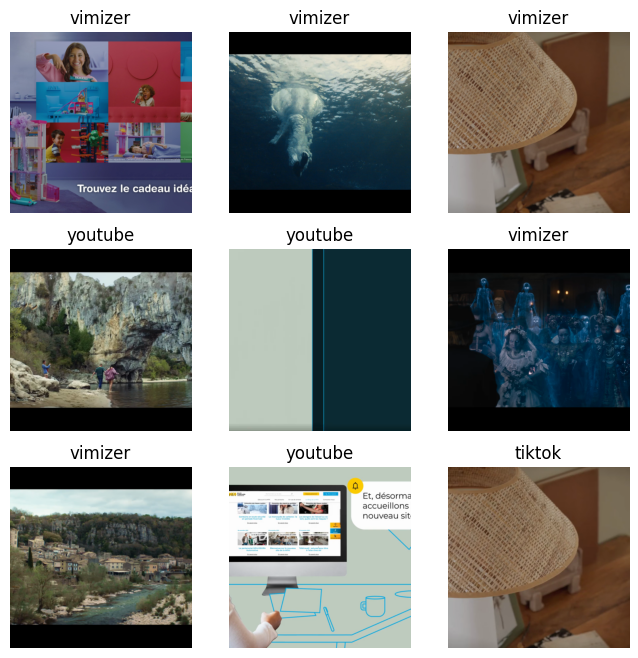

In [8]:
labels_map = {
    0: "tiktok" ,
    1:"vimizer",
    2: "youtube", 
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_dataset), size=(1,)).item()
    print(sample_idx)
    img, label = training_dataset[sample_idx]
    print(label)
    print(img.type())
    # img=img.numpy()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(denormalize(img))
plt.show()